In [ ]:
# We are going to make a Neural Network that recognizes handwritten digits using stochastic gradient descent and the MNIST training data
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
# We want to load our dataset from my personal gdrive, we cant do it normally (using pd.read_csv instantly), we need to connect our google collab with out
# gdrive using the drive library then we want to mount it. if we use jupyter notebook (local DS) we can just use read_csv, this is not possibly
# in google collab
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Grab the dataframe using full links, i dont think we can grab it using ../../ syntax
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Tensorflow Pembelajaran Mandiri/Manual Neural Network and ML/MNIST Digit Identification/data/train.csv')

In [ ]:
# see whats inside our dataframe
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we want to either parse the dataframe into a numpy array or a tensorflow dataset normally
# but because we are going to make the machine learning algorithm manually, we can only
# use numpy array
data = np.array(df)
m, n = data.shape

In [ ]:
# Split the array into a train data and test data, we shall first shuffle the data
np.random.shuffle(data)


In [ ]:
# we will now split it into training data and test data, we also need to Transpose it so we can do matrix multiplication with it
test_data = data[0:1000].T
# we grab the y label, the column are now rows, so row 1 is the y label
y_test = test_data[0]


# n is 785 which is the column value before we transpose it
x_test = test_data[1:n]
x_test = x_test/255

# m is how many rows we have, we then transpose it to do matrix multiplication easier
train_data = data[1000:m].T
y_train = train_data[0]
x_train = train_data[1:n]
x_train = x_train/255



In [ ]:
# check our array
print(f"The size of our y label is {len(y_train)}")
print(f"The features are {len(x_train[:,0])}")
y_train

The size of our y label is 41000
The features are 784


array([8, 4, 5, ..., 9, 0, 6])

In [ ]:
# we will now start the algorithm to create the AI by making a random weight first
# we create 10 weight and 10 biases because we want 10 nodes in our neural network
def init_param():
  # 10 rows 784 columns for our initial node (the input)
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  # 10 row 10 column for our hidden layer (our actual neural network)
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0) #if the element that is inserted is less than 0, it will become 0, if its higher than 0, it will stay as Z

def softmax(Z):
  return np.exp(Z)/ sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # this create a matrix of 10 nodes
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  # this will return 0 if Z is lower than 0, or Z if it is higher than 0
  return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)

  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)

  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha *db2
  return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/ Y.size

def gradient_descent (X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_param()

  for i in range(0, iterations):

    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    # every 50th iterration we are going to print our accuracy
    if i % 50 == 0:
      print(f"Iteration: {i}")
      print(f"Accuracy: {get_accuracy(get_predictions(A2), Y)}")

  return W1, b2, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 500, 0.1)

Iteration: 0
[0 1 1 ... 9 5 7] [8 4 5 ... 9 0 6]
Accuracy: 0.12217073170731707
Iteration: 10
[6 1 1 ... 9 5 8] [8 4 5 ... 9 0 6]
Accuracy: 0.1980487804878049
Iteration: 20
[6 1 1 ... 9 5 8] [8 4 5 ... 9 0 6]
Accuracy: 0.2446341463414634
Iteration: 30
[4 4 1 ... 9 5 8] [8 4 5 ... 9 0 6]
Accuracy: 0.2789268292682927
Iteration: 40
[4 4 1 ... 9 5 1] [8 4 5 ... 9 0 6]
Accuracy: 0.31029268292682927
Iteration: 50
[4 4 1 ... 9 5 1] [8 4 5 ... 9 0 6]
Accuracy: 0.34685365853658534
Iteration: 60
[4 4 1 ... 9 5 0] [8 4 5 ... 9 0 6]
Accuracy: 0.38834146341463416
Iteration: 70
[4 4 1 ... 9 5 0] [8 4 5 ... 9 0 6]
Accuracy: 0.43665853658536585
Iteration: 80
[8 4 1 ... 9 5 0] [8 4 5 ... 9 0 6]
Accuracy: 0.481390243902439
Iteration: 90
[8 4 1 ... 9 5 0] [8 4 5 ... 9 0 6]
Accuracy: 0.521390243902439
Iteration: 100
[8 4 1 ... 9 5 0] [8 4 5 ... 9 0 6]
Accuracy: 0.5533170731707318
Iteration: 110
[8 4 1 ... 9 5 0] [8 4 5 ... 9 0 6]
Accuracy: 0.5814146341463414
Iteration: 120
[8 4 1 ... 9 5 0] [8 4 5 ... 9 0 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  prediction = get_predictions(A2)
  return prediction

def test_prediction(index, W1, b1, W2, b2):
  current_image = x_train[:, index, None]
  prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
  label = y_train[index]
  print(f"Prediction: {prediction}")
  print(f"Label: {label}")

  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation = 'nearest')
  plt.show()

Prediction: [7]
Label: 7


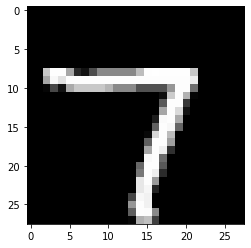

In [ ]:
test_prediction(5, W1, b1, W2, b2)